In [2]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Создаём Функцию

In [3]:
def function(x, y):
  return 12 * np.exp(-x**2/np.pi - y**2/np.pi)  - 0.5*np.sin(0.2*x*y)
np.random.seed(35)

# Строим график

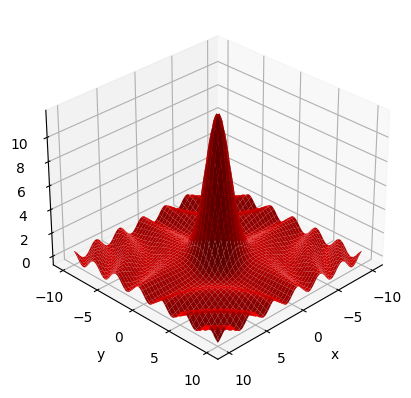

In [4]:
# Generate the x, y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the z values for each (x, y) point
Z = function(X, Y)

# Plot the surface graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='r')

# Set the labels for the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Set the initial view of the plot
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()

# Оптимум по количеству нейронов

32/32 [==============================] - 0s 2ms/step - loss: 0.1148 - mae: 0.2947


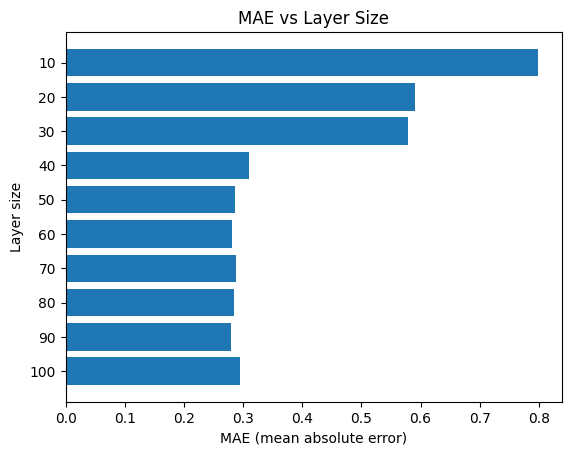

In [5]:
# Generate training data
train_args = np.random.uniform(low=-10, high=10, size=(1000, 2))
train_z = function(train_args[:, 0], train_args[:, 1])

# Generate testing data
test_args = np.random.uniform(low=-10, high=10, size=(1000, 2))
test_z = function(test_args[:, 0], test_args[:, 1])

# Define layer sizes to test
layer_sizes = [10 * (i + 1) for i in range(10)]

# Train and test models with varying layer sizes
mae_values = []
for size in layer_sizes:
    inputs = Input(shape=(2,))
    hidden_layer = Dense(size, activation='relu')(inputs)
    for i in range(size // 10 - 1):
        hidden_layer = Dense(size, activation='relu')(hidden_layer)
    outputs = Dense(1)(hidden_layer)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model
    model.fit(train_args, train_z, epochs=10, verbose=0)

    # Test the model
    _, mae = model.evaluate(test_args, test_z)

    mae_values.append(mae)

# Plot the MAE values against layer sizes
fig, ax = plt.subplots()
y_pos = np.arange(len(layer_sizes))
ax.barh(y_pos, mae_values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(layer_sizes)
ax.invert_yaxis()
ax.set_xlabel('MAE (mean absolute error)')
ax.set_ylabel('Layer size')
ax.set_title('MAE vs Layer Size')
plt.show()

# Выбор оптимальной конфигурации модели

In [6]:
# Generate some random data for training and testing
train_args = np.random.rand(1000, 2)
train_args = (train_args - 0.5) * 20
train_z = function(train_args[:,0], train_args[:,1])

test_args = np.random.rand(1000, 2)
test_args = (test_args - 0.5) * 20
test_z = function(test_args[:,0], test_args[:,1])

# Сужающаяся модель
inputs = Input(shape=(2,))
hidden_layer = Dense(500, activation='relu')(inputs)
hidden_layer = Dense(150, activation='relu')(hidden_layer)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
hidden_layer = Dense(40, activation='relu')(hidden_layer)
hidden_layer = Dense(10, activation='relu')(hidden_layer)

outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_args, train_z, epochs=40, verbose=0)

conv_res = model.evaluate(test_args, test_z, verbose=0)

In [7]:
# Расширяющаяся модель
inputs = Input(shape=(2,))
hidden_layer = Dense(10, activation='relu')(inputs)
hidden_layer = Dense(40, activation='relu')(hidden_layer)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
hidden_layer = Dense(150, activation='relu')(hidden_layer)
hidden_layer = Dense(500, activation='relu')(hidden_layer)

outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_args, train_z, epochs=40, verbose=0)

anti_conv_res = model.evaluate(test_args, test_z, verbose=0)

In [8]:
# Равномерная модель
inputs = Input(shape=(2,))
hidden_layer = Dense(80, activation='relu')(inputs)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)
hidden_layer = Dense(80, activation='relu')(hidden_layer)


outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_args, train_z, epochs=40, verbose=0)

flat_res = model.evaluate(test_args, test_z, verbose=0)

In [9]:

# Плавающая модель
inputs = Input(shape=(2,))
hidden_layer = Dense(60, activation='relu')(inputs)
hidden_layer = Dense(140, activation='relu')(hidden_layer)
hidden_layer = Dense(60, activation='relu')(hidden_layer)
hidden_layer = Dense(140, activation='relu')(hidden_layer)
hidden_layer = Dense(60, activation='relu')(hidden_layer)
hidden_layer = Dense(140, activation='relu')(hidden_layer)
hidden_layer = Dense(60, activation='relu')(hidden_layer)
hidden_layer = Dense(140, activation='relu')(hidden_layer)


outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_args, train_z, epochs=40, verbose=0)

float_res = model.evaluate(test_args, test_z, verbose=0)


In [10]:
print("Сужающаяся: ", conv_res)
print("Расширяющаяся: ", anti_conv_res)
print("Равномерная модель: ", flat_res)
print("Плавающая модель: ", float_res)

Сужающаяся:  [0.07614454627037048, 0.2301217019557953]
Расширяющаяся:  [0.07024586945772171, 0.2069111168384552]
Равномерная модель:  [0.06254512816667557, 0.20141510665416718]
Плавающая модель:  [0.06559031456708908, 0.20022310316562653]


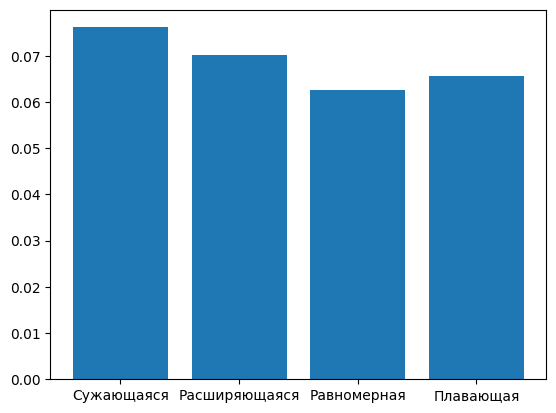

In [11]:
x = ['Сужающаяся', 'Расширяющаяся', 'Равномерная', 'Плавающая']
y1 = [conv_res[0], anti_conv_res[0], flat_res[0], float_res[0]]


plt.bar(x, y1)

plt.show()


# Оптимум по количеству эпох

In [14]:
train_args = np.random.rand(1000, 2)
train_args = (train_args - 0.5) * 20
train_z = function(train_args[:,0], train_args[:,1])

test_args = np.random.rand(100, 2)
test_args = (test_args - 0.5) * 20
test_z = function(test_args[:,0], test_args[:,1])

4/4 [==============================] - 0s 6ms/step - loss: 0.0313 - mae: 0.1208


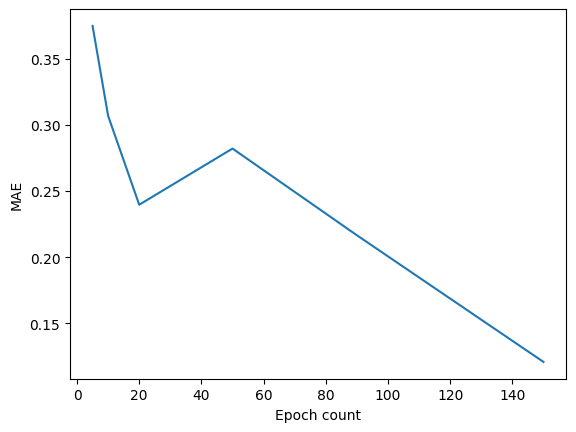

In [15]:
# Количества эпох
epoch_count = [5, 10, 20, 50, 90, 150]

# Обучаем модели на разных количествах эпох
mae_values = []
for ep in epoch_count:

    # Сужающаяся модель
    inputs = Input(shape=(2,))
    hidden_layer = Dense(500, activation='relu')(inputs)
    hidden_layer = Dense(150, activation='relu')(hidden_layer)
    hidden_layer = Dense(100, activation='relu')(hidden_layer)
    hidden_layer = Dense(40, activation='relu')(hidden_layer)
    hidden_layer = Dense(10, activation='relu')(hidden_layer)

    outputs = Dense(1)(hidden_layer)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(train_args, train_z, epochs=ep, verbose=0)

    conv_res = model.evaluate(test_args, test_z, verbose=0)
    _, mae = model.evaluate(test_args, test_z)

    mae_values.append(mae)

# Строим графики
plt.plot(epoch_count, mae_values)
plt.xlabel('Epoch count')
plt.ylabel('MAE')
plt.show()

# Случайные данные vs Регулярные

In [16]:
#Случайная выборка:

train_args = np.random.rand(1000, 2)
train_args = (train_args - 0.5) * 20
train_z = function(train_args[:,0], train_args[:,1])

test_args = np.random.rand(100, 2)
test_args = (test_args - 0.5) * 20
test_z = function(test_args[:,0], test_args[:,1])

inputs = Input(shape=(2,))
hidden_layer = Dense(500, activation='relu')(inputs)
hidden_layer = Dense(150, activation='relu')(hidden_layer)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
hidden_layer = Dense(40, activation='relu')(hidden_layer)
hidden_layer = Dense(10, activation='relu')(hidden_layer)


outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_args, train_z, epochs=120, verbose=0)

rand_res = model.evaluate(test_args, test_z, verbose=0)

In [17]:
# Регулярная выборка

list_xy = []
list_z = []
for i in range(-10, 10, 32):
  for j in range(-10, 10, 32):
    list_xy.append((i, j))
    list_z.append(function(i, j))

xy_arr = np.array(list_xy)
z_arr = np.array(list_z)

list_xtest_z = []
list_z_test = []
for i in range(-10, 10, 14):
  for j in range(-10, 10, 14):
    list_xtest_z.append((i, j))
    list_z_test.append(function(i, j))

xy_arr_test = np.array(list_xtest_z)
z_arr_test = np.array(list_z_test)




inputs = Input(shape=(2,))
hidden_layer = Dense(500, activation='relu')(inputs)
hidden_layer = Dense(150, activation='relu')(hidden_layer)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
hidden_layer = Dense(40, activation='relu')(hidden_layer)
hidden_layer = Dense(10, activation='relu')(hidden_layer)

outputs = Dense(1)(hidden_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(xy_arr, z_arr, epochs=120, verbose=0)

regular_res = model.evaluate(xy_arr_test, z_arr_test, verbose=0)


In [18]:
print('Регулярная выборка: ', regular_res[0])
print('Случайная выборка: ', rand_res[0])

Регулярная выборка:  0.31367582082748413
Случайная выборка:  0.0330742746591568


# Оптимум по размерам обучающей выборки

32/32 [==============================] - 0s 2ms/step - loss: 0.0480 - mae: 0.1417


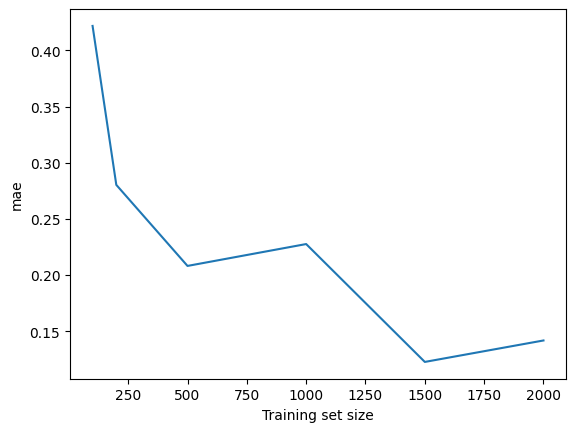

In [20]:
# Размеры выборок
train_sizes = [100, 200, 500, 1000, 1500, 2000]

# Обучаем модели на разных выборках
mae_values = []
for size in train_sizes:
    train_args = np.random.rand(size, 2)
    train_args = (train_args - 0.5) * 20
    train_z = function(train_args[:,0], train_args[:,1])

    test_args = np.random.rand(1000, 2)
    test_args = (test_args - 0.5) * 20
    test_z = function(test_args[:,0], test_args[:,1])

    inputs = Input(shape=(2,))
    hidden_layer = Dense(500, activation='relu')(inputs)
    hidden_layer = Dense(150, activation='relu')(hidden_layer)
    hidden_layer = Dense(100, activation='relu')(hidden_layer)
    hidden_layer = Dense(40, activation='relu')(hidden_layer)
    hidden_layer = Dense(10, activation='relu')(hidden_layer)
    outputs = Dense(1)(hidden_layer)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(train_args, train_z, epochs=120, verbose=0)

    _, mae = model.evaluate(test_args, test_z)

    mae_values.append(mae)

# Строим графики
plt.plot(train_sizes, mae_values)
plt.xlabel('Training set size')
plt.ylabel('mae')
plt.show()

# График, построенный нейронной сетью

29/29 [==============================] - 0s 2ms/step
График по результатам нейронной сети
Параметры нейронной сети: плавающая конфигурация, всего 800 нейронов 
случайная выборка, размером 1500 элементов, 120 эпох


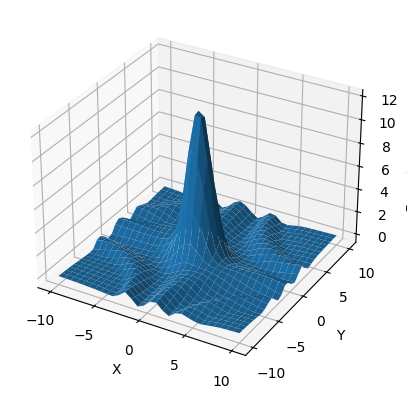

In [21]:

train_args = np.random.rand(1500, 2)
train_args = (train_args - 0.5) * 20
train_z = function(train_args[:,0], train_args[:,1])

test_args = np.random.rand(100, 2)
test_args = (test_args - 0.5) * 20
test_z = function(test_args[:,0], test_args[:,1])


inputs = Input(shape=(2,))
hidden_layer = Dense(500, activation='relu')(inputs)
hidden_layer = Dense(150, activation='relu')(hidden_layer)
hidden_layer = Dense(100, activation='relu')(hidden_layer)
hidden_layer = Dense(40, activation='relu')(hidden_layer)
hidden_layer = Dense(10, activation='relu')(hidden_layer)
outputs = Dense(1)(hidden_layer)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(train_args, train_z, epochs=120, verbose=0)


xx, yy = np.meshgrid(np.linspace(-10, 10, 30), np.linspace(-10, 10, 30))
X_grid = np.column_stack((xx.ravel(), yy.ravel()))

y_grid = model.predict(X_grid)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, y_grid.reshape(xx.shape))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function value')
print("График по результатам нейронной сети")
print("Параметры нейронной сети: плавающая конфигурация, всего 800 нейронов ")
print("случайная выборка, размером 1500 элементов, 120 эпох")

plt.show()

Оригинальный график функции: 


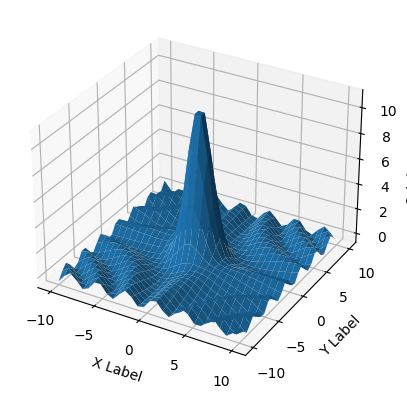

In [22]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

x = y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
zs = np.array([function(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax1.plot_surface(X, Y, Z)


ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Original func')

print('Оригинальный график функции: ')

plt.show()

График разницы оригинальной функции и расчетов нейронной сети: 


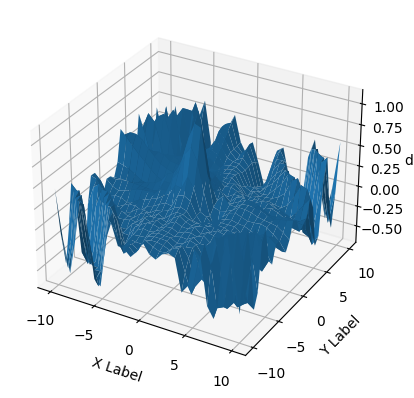

In [23]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

x = y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
zs = y_grid.reshape(xx.shape) - Z


Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, zs)


ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('diff')

print('График разницы оригинальной функции и расчетов нейронной сети: ')

plt.show()